In [2]:
%matplotlib inline
#Import dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
#Import csv files
city_data_load = "Resources/city_data.csv"
ride_data_load = "Resources/ride_data.csv"

In [8]:
#Read city data in Pandas
city_data_df = pd.read_csv(city_data_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [9]:
#Read ride data in Pandas
ride_data_df = pd.read_csv(ride_data_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [13]:
#The columns and rows in city_data that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [14]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [15]:
#Data type of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [17]:
#Number of data points for each city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [18]:
#Number of Urban cities
sum(city_data_df["type"] == "Urban")

66

In [19]:
#Number of Suburban cities
sum(city_data_df["type"] == "Suburban")

36

In [20]:
#Number of Rural cities
sum(city_data_df["type"] == "Rural")

18

In [21]:
#The columns and rows in ride_data that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [23]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [25]:
#Data type of each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [31]:
#New merged DataFrame
pyber_ride_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])
pyber_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [33]:
#Create the Urban DataFrame
urban_data_df = pyber_ride_df[pyber_ride_df["type"] == "Urban"]
urban_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [35]:
#Create the suburban and rural data frames
suburban_data_df = pyber_ride_df[pyber_ride_df["type"] == "Suburban"]
rural_data_df = pyber_ride_df[pyber_ride_df["type"] == "Rural"]
rural_data_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [36]:
#Number of rides in urban cities
urban_ride_count = urban_data_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [37]:
#Suburban and Rural number of rides
suburban_ride_count = suburban_data_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_data_df.groupby(["city"]).count()["ride_id"]

In [39]:
#Urban average city fare
urban_avg_fare = urban_data_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [40]:
#Suburban and Rural average fare
suburban_avg_fare = suburban_data_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_data_df.groupby(["city"]).mean()["fare"]

In [42]:
#Average number of drivers in urban cities
urban_driver_count = urban_data_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [43]:
#Average driveers in suburban and rural cities
suburban_driver_count = suburban_data_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_data_df.groupby(["city"]).mean()["driver_count"]

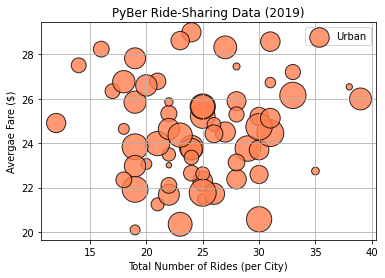

In [45]:
#Urban Cities bubble chart
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, color="coral", edgecolor="black", linewidths=1, alpha=.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Avergae Fare ($)")
plt.legend()
plt.grid(True)

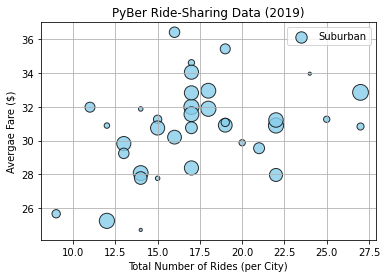

In [46]:
#Suburban Cities bubble chart
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, color="skyblue", edgecolor="black", linewidths=1, alpha=.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Avergae Fare ($)")
plt.legend()
plt.grid(True)

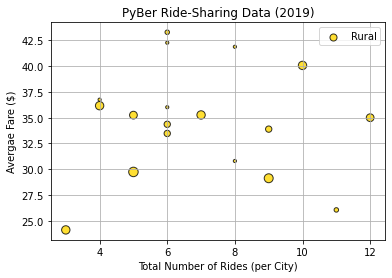

In [48]:
#Rural Cities buble chart
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, color="gold", edgecolor="black", linewidths=1, alpha=.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Avergae Fare ($)")
plt.legend()
plt.grid(True)

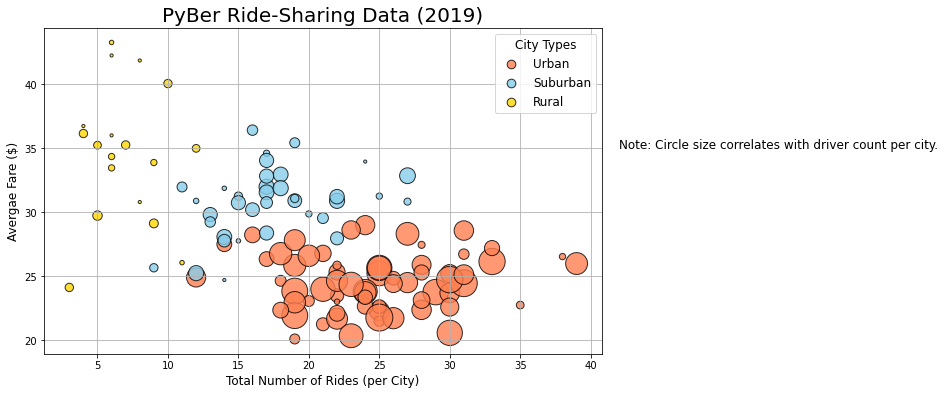

<Figure size 432x288 with 0 Axes>

In [55]:
#All cities bubble chart
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, color="coral", edgecolor="black", linewidths=1, alpha=.8, label="Urban")
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, color="skyblue", edgecolor="black", linewidths=1, alpha=.8, label="Suburban")
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, color="gold", edgecolor="black", linewidths=1, alpha=.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.xlabel("Total Number of Rides (per City)", fontsize=12)
plt.ylabel("Avergae Fare ($)", fontsize=12)
plt.grid(True)
#Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
plt.show()
# Save the figure.
plt.savefig("Analysis/Fig1.png")